In [1]:
import sys, os
import gym
from collections import defaultdict, deque
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
env  = gym.make("LunarLander-v2")

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Box(8,)


In [4]:
from ddpg_agent import Agent

In [11]:
seed  =12345

def run_ddpg(env, num_episodes = 1000, max_steps = 300):
    action_size = env.action_space.n
    state_size = env.observation_space.shape[0]

    agent = Agent(state_size, action_size, seed)
    
    score_list = []
    
    for episode_i in range(num_episodes):
        state = env.reset()
        episode_score = 0
        for step in range(max_steps):
            action, prob_action = agent.act(state)
            next_state, reward, done, info = env.step(action)
            agent.step(state, prob_action, reward, next_state, done)
            episode_score += reward
            state = next_state
            
            print("\rstep {} from {}".format(step, max_steps), end="", flush=True)
            
            if done:
                break            
        
        score_list.append(episode_score)
        score = np.mean(score_list[-100:]) if len(score_list) > 100 else np.mean(score_list)
        print("\tspisode:{}\tescore: {}".format(episode_i, score))
        
        if score >= 200:
            print("Environment was solved in {} episodes!".format(episode_i))
            break
        
    
    return score, agent

In [12]:
scores, agent = run_ddpg(env)

step 141 from 300	spisode:0	escore: -545.5366228325094
step 99 from 300	spisode:1	escore: -356.9235106620823
step 57 from 300	spisode:2	escore: -378.50943911788016
step 61 from 300	spisode:3	escore: -399.9593548989212
step 53 from 300	spisode:4	escore: -390.13936202642833
step 69 from 300	spisode:5	escore: -380.8808996370647
step 52 from 300	spisode:6	escore: -339.82174811110536
step 69 from 300	spisode:7	escore: -317.4834361497652
step 56 from 300	spisode:8	escore: -296.4675836648245
step 73 from 300	spisode:9	escore: -280.65372638250903
step 83 from 300	spisode:10	escore: -267.35568112242163
step 51 from 300	spisode:11	escore: -254.0235002440627
step 76 from 300	spisode:12	escore: -245.60210382202
step 55 from 300	spisode:13	escore: -234.7975900566846
step 89 from 300	spisode:14	escore: -226.80011127646085
step 54 from 300	spisode:15	escore: -238.5556592859183
step 66 from 300	spisode:16	escore: -256.3445284206774
step 81 from 300	spisode:17	escore: -283.54606533356747
step 53 from 3

step 63 from 300	spisode:147	escore: -131.8437386901638
step 58 from 300	spisode:148	escore: -131.9656048670359
step 83 from 300	spisode:149	escore: -131.89294772352798
step 62 from 300	spisode:150	escore: -131.7380025527655
step 88 from 300	spisode:151	escore: -131.86688893610616
step 52 from 300	spisode:152	escore: -131.6072627356364
step 70 from 300	spisode:153	escore: -131.97104223890526
step 73 from 300	spisode:154	escore: -131.02034511852506
step 71 from 300	spisode:155	escore: -131.2831669721665
step 87 from 300	spisode:156	escore: -130.64478707911002
step 64 from 300	spisode:157	escore: -130.85419963811353
step 60 from 300	spisode:158	escore: -130.78487892341738
step 70 from 300	spisode:159	escore: -130.9108212273679
step 54 from 300	spisode:160	escore: -129.91522599609362
step 62 from 300	spisode:161	escore: -129.53193169232753
step 88 from 300	spisode:162	escore: -128.97049668031178
step 60 from 300	spisode:163	escore: -128.43418997068454
step 66 from 300	spisode:164	escore: 

step 50 from 300	spisode:291	escore: -211.0367151159113
step 67 from 300	spisode:292	escore: -209.8599514469674
step 193 from 300	spisode:293	escore: -212.78933620542358
step 239 from 300	spisode:294	escore: -213.84098876778157
step 299 from 300	spisode:295	escore: -213.43528626238552
step 67 from 300	spisode:296	escore: -213.82874959063008
step 119 from 300	spisode:297	escore: -213.62056052868257
step 299 from 300	spisode:298	escore: -214.41752072130782
step 201 from 300	spisode:299	escore: -214.68656181184747
step 75 from 300	spisode:300	escore: -215.00108074352454
step 91 from 300	spisode:301	escore: -213.92948743789285
step 277 from 300	spisode:302	escore: -214.6737747458956
step 227 from 300	spisode:303	escore: -216.68475419854462
step 209 from 300	spisode:304	escore: -217.28062929232658
step 77 from 300	spisode:305	escore: -217.2658469773986
step 87 from 300	spisode:306	escore: -218.14634573499163
step 299 from 300	spisode:307	escore: -219.0517714308107
step 98 from 300	spisode:3

step 296 from 300	spisode:434	escore: -186.96470882791084
step 299 from 300	spisode:435	escore: -185.74924174540948
step 252 from 300	spisode:436	escore: -185.79146178998755
step 299 from 300	spisode:437	escore: -183.82072719198345
step 299 from 300	spisode:438	escore: -183.87787241139046
step 299 from 300	spisode:439	escore: -181.85937105563167
step 299 from 300	spisode:440	escore: -181.55430422103225
step 299 from 300	spisode:441	escore: -179.7227935743175
step 275 from 300	spisode:442	escore: -179.452567983523
step 239 from 300	spisode:443	escore: -178.99155508935124
step 251 from 300	spisode:444	escore: -179.24533911666524
step 268 from 300	spisode:445	escore: -179.53430421542672
step 279 from 300	spisode:446	escore: -180.5609768060138
step 269 from 300	spisode:447	escore: -181.12807411929606
step 218 from 300	spisode:448	escore: -181.8463906935757
step 281 from 300	spisode:449	escore: -182.39579389690118
step 276 from 300	spisode:450	escore: -181.6910752193964
step 299 from 300	sp

step 299 from 300	spisode:577	escore: -96.01761517414066
step 299 from 300	spisode:578	escore: -94.42232999612415
step 299 from 300	spisode:579	escore: -93.66039187505157
step 299 from 300	spisode:580	escore: -93.52803928058957
step 270 from 300	spisode:581	escore: -94.9034130464115
step 263 from 300	spisode:582	escore: -94.3616957767194
step 299 from 300	spisode:583	escore: -94.24281720169836
step 299 from 300	spisode:584	escore: -92.4865972476232
step 299 from 300	spisode:585	escore: -91.11193916618191
step 299 from 300	spisode:586	escore: -90.9929442459864
step 299 from 300	spisode:587	escore: -90.70806477994391
step 299 from 300	spisode:588	escore: -90.48516386869507
step 299 from 300	spisode:589	escore: -88.65685091435407
step 299 from 300	spisode:590	escore: -85.9172526281267
step 299 from 300	spisode:591	escore: -85.91603296043787
step 299 from 300	spisode:592	escore: -84.26227027804985
step 299 from 300	spisode:593	escore: -81.99714396700871
step 299 from 300	spisode:594	escore

step 299 from 300	spisode:721	escore: -9.947544058613614
step 299 from 300	spisode:722	escore: -9.600339130252351
step 299 from 300	spisode:723	escore: -8.442097502635843
step 299 from 300	spisode:724	escore: -8.095985709517564
step 299 from 300	spisode:725	escore: -8.040128948845767
step 141 from 300	spisode:726	escore: -8.297318365465102
step 276 from 300	spisode:727	escore: -10.00799496408291
step 299 from 300	spisode:728	escore: -9.434504607338885
step 299 from 300	spisode:729	escore: -9.887880191574334
step 299 from 300	spisode:730	escore: -9.095293864682796
step 299 from 300	spisode:731	escore: -9.281973299868273
step 299 from 300	spisode:732	escore: -9.252081487660327
step 299 from 300	spisode:733	escore: -8.80973767554807
step 299 from 300	spisode:734	escore: -8.59383936659011
step 299 from 300	spisode:735	escore: -8.608082870145216
step 299 from 300	spisode:736	escore: -7.595547964326084
step 299 from 300	spisode:737	escore: -7.6627186026404495
step 299 from 300	spisode:738	es

step 299 from 300	spisode:864	escore: -53.65788729758105
step 299 from 300	spisode:865	escore: -53.44474784895492
step 299 from 300	spisode:866	escore: -52.028468848311704
step 126 from 300	spisode:867	escore: -52.3054288917815
step 299 from 300	spisode:868	escore: -50.44450071001906
step 162 from 300	spisode:869	escore: -52.35902393517419
step 299 from 300	spisode:870	escore: -50.87098335554753
step 299 from 300	spisode:871	escore: -50.23114203146565
step 299 from 300	spisode:872	escore: -50.3613002774063
step 299 from 300	spisode:873	escore: -50.517077562845095
step 299 from 300	spisode:874	escore: -49.9905880081903
step 126 from 300	spisode:875	escore: -49.5519867684756
step 299 from 300	spisode:876	escore: -48.22901179940462
step 299 from 300	spisode:877	escore: -48.48722131343044
step 299 from 300	spisode:878	escore: -48.63347807524126
step 171 from 300	spisode:879	escore: -49.35773476571604
step 299 from 300	spisode:880	escore: -49.7123372908558
step 137 from 300	spisode:881	esco

In [21]:
text = """step 141 from 300	spisode:0	escore: -545.5366228325094
step 99 from 300	spisode:1	escore: -356.9235106620823
step 57 from 300	spisode:2	escore: -378.50943911788016
step 61 from 300	spisode:3	escore: -399.9593548989212
step 53 from 300	spisode:4	escore: -390.13936202642833
step 69 from 300	spisode:5	escore: -380.8808996370647
step 52 from 300	spisode:6	escore: -339.82174811110536
step 69 from 300	spisode:7	escore: -317.4834361497652
step 56 from 300	spisode:8	escore: -296.4675836648245
step 73 from 300	spisode:9	escore: -280.65372638250903
step 83 from 300	spisode:10	escore: -267.35568112242163
step 51 from 300	spisode:11	escore: -254.0235002440627
step 76 from 300	spisode:12	escore: -245.60210382202
step 55 from 300	spisode:13	escore: -234.7975900566846
step 89 from 300	spisode:14	escore: -226.80011127646085
step 54 from 300	spisode:15	escore: -238.5556592859183
step 66 from 300	spisode:16	escore: -256.3445284206774
step 81 from 300	spisode:17	escore: -283.54606533356747
step 53 from 300	spisode:18	escore: -286.82355866722673
step 52 from 300	spisode:19	escore: -284.0592332350869
step 52 from 300	spisode:20	escore: -285.57844633196925
step 50 from 300	spisode:21	escore: -292.4290759497058
step 81 from 300	spisode:22	escore: -301.0551853403135
step 60 from 300	spisode:23	escore: -297.77824755521334
step 77 from 300	spisode:24	escore: -291.8789075226623
step 85 from 300	spisode:25	escore: -283.2345642929419
step 67 from 300	spisode:26	escore: -278.0392224922957
step 78 from 300	spisode:27	escore: -273.45346159019897
step 54 from 300	spisode:28	escore: -267.68840663584257
step 53 from 300	spisode:29	escore: -262.5221048273316
step 57 from 300	spisode:30	escore: -259.18097399036986
step 52 from 300	spisode:31	escore: -254.35409964926734
step 72 from 300	spisode:32	escore: -252.37712612535202
step 81 from 300	spisode:33	escore: -248.94528210834565
step 55 from 300	spisode:34	escore: -244.54782142022205
step 59 from 300	spisode:35	escore: -240.8596708482984
step 76 from 300	spisode:36	escore: -238.25000942888443
step 86 from 300	spisode:37	escore: -234.93238774680609
step 57 from 300	spisode:38	escore: -231.2728463826905
step 51 from 300	spisode:39	escore: -228.2703746585891
step 74 from 300	spisode:40	escore: -225.6079576709884
step 84 from 300	spisode:41	escore: -223.3276989420659
step 54 from 300	spisode:42	escore: -221.56934005315836
step 66 from 300	spisode:43	escore: -219.5449716157574
step 83 from 300	spisode:44	escore: -217.47193046309317
step 71 from 300	spisode:45	escore: -216.23113809355135
step 58 from 300	spisode:46	escore: -214.2377971445888
step 72 from 300	spisode:47	escore: -210.6408485458184
step 52 from 300	spisode:48	escore: -208.11639955157554
step 68 from 300	spisode:49	escore: -207.03403834648753
step 79 from 300	spisode:50	escore: -205.94669382360698
step 54 from 300	spisode:51	escore: -204.31650038527525
step 69 from 300	spisode:52	escore: -203.05100682215806
step 87 from 300	spisode:53	escore: -201.19732885299143
step 87 from 300	spisode:54	escore: -201.45792756617655
step 53 from 300	spisode:55	escore: -199.5470578431417
step 52 from 300	spisode:56	escore: -198.40541457236807
step 62 from 300	spisode:57	escore: -196.95597405081259
step 75 from 300	spisode:58	escore: -196.1322760940231
step 52 from 300	spisode:59	escore: -194.9342692989199
step 102 from 300	spisode:60	escore: -195.47082959885856
step 68 from 300	spisode:61	escore: -194.85258154098574
step 76 from 300	spisode:62	escore: -194.58758728650673
step 86 from 300	spisode:63	escore: -194.4447340713552
step 65 from 300	spisode:64	escore: -193.79438230843854
step 76 from 300	spisode:65	escore: -192.86400979766702
step 71 from 300	spisode:66	escore: -192.3184198526406
step 82 from 300	spisode:67	escore: -191.21402615563673
step 110 from 300	spisode:68	escore: -193.28783555393844
step 59 from 300	spisode:69	escore: -192.365216109131
step 62 from 300	spisode:70	escore: -191.30453382081726
step 53 from 300	spisode:71	escore: -190.74300000208916
step 52 from 300	spisode:72	escore: -189.88115259375596
step 61 from 300	spisode:73	escore: -189.17396487543124
step 67 from 300	spisode:74	escore: -188.2884646793638
step 59 from 300	spisode:75	escore: -187.58170398165504
step 54 from 300	spisode:76	escore: -186.58886746490882
step 85 from 300	spisode:77	escore: -185.5349401043632
step 59 from 300	spisode:78	escore: -184.99249395450764
step 64 from 300	spisode:79	escore: -184.51959136730162
step 74 from 300	spisode:80	escore: -184.21170122899397
step 74 from 300	spisode:81	escore: -183.52980856017382
step 74 from 300	spisode:82	escore: -183.3033875807245
step 50 from 300	spisode:83	escore: -182.39103540683334
step 125 from 300	spisode:84	escore: -182.29855343113007
step 61 from 300	spisode:85	escore: -181.81992074959743
step 84 from 300	spisode:86	escore: -181.1062552269475
step 85 from 300	spisode:87	escore: -180.07292044116355
step 86 from 300	spisode:88	escore: -179.4267738482784
step 88 from 300	spisode:89	escore: -179.1609747357002
step 56 from 300	spisode:90	escore: -178.4038550424683
step 76 from 300	spisode:91	escore: -178.17742452419117
step 90 from 300	spisode:92	escore: -177.77587854162476
step 88 from 300	spisode:93	escore: -177.23254855358135
step 53 from 300	spisode:94	escore: -176.81675018182872
step 66 from 300	spisode:95	escore: -176.53274030603086
step 86 from 300	spisode:96	escore: -176.03405671756028
step 59 from 300	spisode:97	escore: -175.5205796738919
step 83 from 300	spisode:98	escore: -174.99804799668772
step 71 from 300	spisode:99	escore: -174.50805741280098
step 51 from 300	spisode:100	escore: -170.20363781062287
step 53 from 300	spisode:101	escore: -169.5832350034776
step 66 from 300	spisode:102	escore: -166.77149644874612
step 54 from 300	spisode:103	escore: -163.08185382718662
step 66 from 300	spisode:104	escore: -160.89558628127824
step 76 from 300	spisode:105	escore: -158.94632169559208
step 69 from 300	spisode:106	escore: -159.45916019689636
step 58 from 300	spisode:107	escore: -159.00657699124454
step 58 from 300	spisode:108	escore: -158.9656929444306
step 79 from 300	spisode:109	escore: -158.63109701913942
step 67 from 300	spisode:110	escore: -158.57928194023765
step 59 from 300	spisode:111	escore: -157.94776406035768
step 52 from 300	spisode:112	escore: -157.8842939908094
step 52 from 300	spisode:113	escore: -158.0320935204532
step 56 from 300	spisode:114	escore: -158.16112792642335
step 51 from 300	spisode:115	escore: -155.39137258305482
step 69 from 300	spisode:116	escore: -151.54317623410319
step 57 from 300	spisode:117	escore: -145.30273802797032
step 72 from 300	spisode:118	escore: -143.12990416462998
step 85 from 300	spisode:119	escore: -142.31037522645877
step 62 from 300	spisode:120	escore: -140.23227505876116
step 51 from 300	spisode:121	escore: -137.13098376340275
step 88 from 300	spisode:122	escore: -133.27959676952622
step 83 from 300	spisode:123	escore: -132.40048792792743
step 76 from 300	spisode:124	escore: -131.71430157065163
step 79 from 300	spisode:125	escore: -132.57660587673888
step 60 from 300	spisode:126	escore: -132.41321017464017
step 67 from 300	spisode:127	escore: -132.16428742732083
step 65 from 300	spisode:128	escore: -132.44682122690585
step 55 from 300	spisode:129	escore: -132.22787628906346
step 71 from 300	spisode:130	escore: -132.17058285463966
step 70 from 300	spisode:131	escore: -132.3864511105802
step 84 from 300	spisode:132	escore: -132.40627518881266
step 69 from 300	spisode:133	escore: -130.64894076597813
step 54 from 300	spisode:134	escore: -130.8548125067643
step 76 from 300	spisode:135	escore: -130.87401522324427
step 86 from 300	spisode:136	escore: -130.66901882663672
step 60 from 300	spisode:137	escore: -131.20212477539712
step 87 from 300	spisode:138	escore: -130.17308127502739
step 73 from 300	spisode:139	escore: -130.66084407082823
step 57 from 300	spisode:140	escore: -131.01763071217113
step 76 from 300	spisode:141	escore: -130.84462957585262
step 68 from 300	spisode:142	escore: -130.91849291422557
step 77 from 300	spisode:143	escore: -131.01299779583616
step 60 from 300	spisode:144	escore: -131.10914609789347
step 55 from 300	spisode:145	escore: -130.81437557621058
step 71 from 300	spisode:146	escore: -131.13330820084886
step 63 from 300	spisode:147	escore: -131.8437386901638
step 58 from 300	spisode:148	escore: -131.9656048670359
step 83 from 300	spisode:149	escore: -131.89294772352798
step 62 from 300	spisode:150	escore: -131.7380025527655
step 88 from 300	spisode:151	escore: -131.86688893610616
step 52 from 300	spisode:152	escore: -131.6072627356364
step 70 from 300	spisode:153	escore: -131.97104223890526
step 73 from 300	spisode:154	escore: -131.02034511852506
step 71 from 300	spisode:155	escore: -131.2831669721665
step 87 from 300	spisode:156	escore: -130.64478707911002
step 64 from 300	spisode:157	escore: -130.85419963811353
step 60 from 300	spisode:158	escore: -130.78487892341738
step 70 from 300	spisode:159	escore: -130.9108212273679
step 54 from 300	spisode:160	escore: -129.91522599609362
step 62 from 300	spisode:161	escore: -129.53193169232753
step 88 from 300	spisode:162	escore: -128.97049668031178
step 60 from 300	spisode:163	escore: -128.43418997068454
step 66 from 300	spisode:164	escore: -128.32240544351973
step 63 from 300	spisode:165	escore: -128.57509914722243
step 75 from 300	spisode:166	escore: -128.49423999289945
step 80 from 300	spisode:167	escore: -128.87436537181918
step 89 from 300	spisode:168	escore: -126.96174055267278
step 90 from 300	spisode:169	escore: -126.60432806949343
step 51 from 300	spisode:170	escore: -126.75505058970086
step 81 from 300	spisode:171	escore: -126.65671435503964
step 73 from 300	spisode:172	escore: -126.65106220873278
step 67 from 300	spisode:173	escore: -126.51907198664817
step 58 from 300	spisode:174	escore: -126.53995974292208
step 89 from 300	spisode:175	escore: -126.3339852983997
step 83 from 300	spisode:176	escore: -126.41256544229715
step 55 from 300	spisode:177	escore: -126.45911678736465
step 55 from 300	spisode:178	escore: -126.48506793877023
step 80 from 300	spisode:179	escore: -125.51797495152465
step 53 from 300	spisode:180	escore: -125.38323339629932
step 53 from 300	spisode:181	escore: -125.29863347292108
step 80 from 300	spisode:182	escore: -124.93952814436241
step 71 from 300	spisode:183	escore: -125.15230587544464
step 91 from 300	spisode:184	escore: -124.51833535937028
step 54 from 300	spisode:185	escore: -124.28549883859363
step 57 from 300	spisode:186	escore: -124.33224129758409
step 51 from 300	spisode:187	escore: -124.37058181022843
step 63 from 300	spisode:188	escore: -124.73543711870681
step 59 from 300	spisode:189	escore: -124.79634662176599
step 80 from 300	spisode:190	escore: -124.68247082874942
step 74 from 300	spisode:191	escore: -124.3777546689922
step 56 from 300	spisode:192	escore: -123.93539578769467
step 50 from 300	spisode:193	escore: -123.80463437775762
step 57 from 300	spisode:194	escore: -123.77481937167673
step 83 from 300	spisode:195	escore: -123.58877760760164
step 59 from 300	spisode:196	escore: -123.30907415887374
step 87 from 300	spisode:197	escore: -123.51504223221244
step 53 from 300	spisode:198	escore: -123.31684872448918
step 52 from 300	spisode:199	escore: -123.38458833459453
step 63 from 300	spisode:200	escore: -123.48909192945197
step 82 from 300	spisode:201	escore: -123.58163704774287
step 58 from 300	spisode:202	escore: -123.49346174288263
step 82 from 300	spisode:203	escore: -124.1909729347751
step 71 from 300	spisode:204	escore: -124.11858609582558
step 54 from 300	spisode:205	escore: -124.06503856621028
step 61 from 300	spisode:206	escore: -124.02001841881385
step 54 from 300	spisode:207	escore: -123.80624639680883
step 83 from 300	spisode:208	escore: -124.1335772311111
step 75 from 300	spisode:209	escore: -124.52048882590208
step 51 from 300	spisode:210	escore: -124.55797937837589
step 89 from 300	spisode:211	escore: -125.45265798554203
step 96 from 300	spisode:212	escore: -125.08481632575072
step 99 from 300	spisode:213	escore: -125.00967363671705
step 70 from 300	spisode:214	escore: -125.20188474015815
step 187 from 300	spisode:215	escore: -124.04315421014701
step 87 from 300	spisode:216	escore: -123.87252126318317
step 155 from 300	spisode:217	escore: -123.79776293859933
step 94 from 300	spisode:218	escore: -123.9579170479305
step 92 from 300	spisode:219	escore: -123.67745057909605
step 60 from 300	spisode:220	escore: -123.85010655798483
step 60 from 300	spisode:221	escore: -123.97806521690467
step 125 from 300	spisode:222	escore: -124.12639309860494
step 56 from 300	spisode:223	escore: -124.27143621075804
step 100 from 300	spisode:224	escore: -124.77912424419551
step 146 from 300	spisode:225	escore: -124.22641576789205
step 57 from 300	spisode:226	escore: -124.38246325562484
step 76 from 300	spisode:227	escore: -124.41805808979176
step 147 from 300	spisode:228	escore: -124.21598216067122
step 110 from 300	spisode:229	escore: -125.26413352966823
step 76 from 300	spisode:230	escore: -125.48040546149068
step 63 from 300	spisode:231	escore: -125.35331959419463
step 192 from 300	spisode:232	escore: -124.75760058569028
step 299 from 300	spisode:233	escore: -125.91930970716535
step 98 from 300	spisode:234	escore: -126.37406776007887
step 67 from 300	spisode:235	escore: -126.91123812887984
step 158 from 300	spisode:236	escore: -127.37835774311166
step 219 from 300	spisode:237	escore: -127.78259874237847
step 94 from 300	spisode:238	escore: -129.48118904496272
step 80 from 300	spisode:239	escore: -129.84073181831113
step 140 from 300	spisode:240	escore: -128.88560118114265
step 158 from 300	spisode:241	escore: -129.05398702874265
step 178 from 300	spisode:242	escore: -130.016888583687
step 83 from 300	spisode:243	escore: -130.4052900515091
step 262 from 300	spisode:244	escore: -132.38739225835477
step 210 from 300	spisode:245	escore: -135.2100850755063
step 119 from 300	spisode:246	escore: -135.0236785908811
step 119 from 300	spisode:247	escore: -134.5453995103414
step 112 from 300	spisode:248	escore: -135.002781315787
step 86 from 300	spisode:249	escore: -136.58368623157065
step 222 from 300	spisode:250	escore: -138.79884921197927
step 92 from 300	spisode:251	escore: -140.24728184619337
step 93 from 300	spisode:252	escore: -141.81244265918906
step 211 from 300	spisode:253	escore: -145.21531865254445
step 158 from 300	spisode:254	escore: -148.74561011892692
step 193 from 300	spisode:255	escore: -154.0004302047674
step 147 from 300	spisode:256	escore: -154.18211162056136
step 189 from 300	spisode:257	escore: -158.54442170929647
step 299 from 300	spisode:258	escore: -157.92058638264905
step 92 from 300	spisode:259	escore: -158.31854008580305
step 228 from 300	spisode:260	escore: -161.07741309141494
step 98 from 300	spisode:261	escore: -163.372799510223
step 182 from 300	spisode:262	escore: -166.10859169746422
step 184 from 300	spisode:263	escore: -170.07897380092302
step 174 from 300	spisode:264	escore: -173.89636750886532
step 166 from 300	spisode:265	escore: -178.5861800977287
step 299 from 300	spisode:266	escore: -177.65866421103954
step 100 from 300	spisode:267	escore: -178.69589183512164
step 137 from 300	spisode:268	escore: -179.91508220202502
step 105 from 300	spisode:269	escore: -181.40051744250258
step 194 from 300	spisode:270	escore: -185.5529376205642
step 235 from 300	spisode:271	escore: -186.62284058482714
step 86 from 300	spisode:272	escore: -186.83430870468897
step 245 from 300	spisode:273	escore: -187.83031993533245
step 184 from 300	spisode:274	escore: -191.6387129799312
step 202 from 300	spisode:275	escore: -195.8321746119692
step 184 from 300	spisode:276	escore: -198.99020335227877
step 73 from 300	spisode:277	escore: -199.39698014827042
step 172 from 300	spisode:278	escore: -202.82057281425725
step 269 from 300	spisode:279	escore: -205.90797809655106
step 78 from 300	spisode:280	escore: -206.37207112420725
step 251 from 300	spisode:281	escore: -206.14428101148195
step 185 from 300	spisode:282	escore: -209.3353214556703
step 82 from 300	spisode:283	escore: -209.92176289571344
step 139 from 300	spisode:284	escore: -210.1840391862528
step 207 from 300	spisode:285	escore: -211.29365999362432
step 87 from 300	spisode:286	escore: -211.65000036534155
step 63 from 300	spisode:287	escore: -212.26328302264426
step 89 from 300	spisode:288	escore: -211.8418189211834
step 66 from 300	spisode:289	escore: -211.63745076674425
step 90 from 300	spisode:290	escore: -211.08778379848866
step 50 from 300	spisode:291	escore: -211.0367151159113
step 67 from 300	spisode:292	escore: -209.8599514469674
step 193 from 300	spisode:293	escore: -212.78933620542358
step 239 from 300	spisode:294	escore: -213.84098876778157
step 299 from 300	spisode:295	escore: -213.43528626238552
step 67 from 300	spisode:296	escore: -213.82874959063008
step 119 from 300	spisode:297	escore: -213.62056052868257
step 299 from 300	spisode:298	escore: -214.41752072130782
step 201 from 300	spisode:299	escore: -214.68656181184747
step 75 from 300	spisode:300	escore: -215.00108074352454
step 91 from 300	spisode:301	escore: -213.92948743789285
step 277 from 300	spisode:302	escore: -214.6737747458956
step 227 from 300	spisode:303	escore: -216.68475419854462
step 209 from 300	spisode:304	escore: -217.28062929232658
step 77 from 300	spisode:305	escore: -217.2658469773986
step 87 from 300	spisode:306	escore: -218.14634573499163
step 299 from 300	spisode:307	escore: -219.0517714308107
step 98 from 300	spisode:308	escore: -219.02111218193411
step 65 from 300	spisode:309	escore: -218.9093453692811
step 236 from 300	spisode:310	escore: -219.4922096582357
step 186 from 300	spisode:311	escore: -221.44982014844624
step 213 from 300	spisode:312	escore: -222.2521678212431
step 240 from 300	spisode:313	escore: -224.1267198311617
step 179 from 300	spisode:314	escore: -224.01519200791037
step 241 from 300	spisode:315	escore: -225.4066967954786
step 299 from 300	spisode:316	escore: -224.93873257320905
step 207 from 300	spisode:317	escore: -225.01982094336498
step 297 from 300	spisode:318	escore: -224.02945225192227
step 257 from 300	spisode:319	escore: -225.37280694627677
step 299 from 300	spisode:320	escore: -224.34686985853313
step 227 from 300	spisode:321	escore: -223.9913998708359
step 299 from 300	spisode:322	escore: -224.19324656328914
step 81 from 300	spisode:323	escore: -224.07444712728613
step 101 from 300	spisode:324	escore: -224.0244441175885
step 221 from 300	spisode:325	escore: -225.13893623642306
step 299 from 300	spisode:326	escore: -224.80600814935565
step 186 from 300	spisode:327	escore: -224.81927234174415
step 228 from 300	spisode:328	escore: -225.95691743806896
step 217 from 300	spisode:329	escore: -226.04735215213572
step 299 from 300	spisode:330	escore: -225.28217822017868
step 272 from 300	spisode:331	escore: -226.74067471700843
step 299 from 300	spisode:332	escore: -225.75247883745072
step 216 from 300	spisode:333	escore: -226.7684317725876
step 90 from 300	spisode:334	escore: -226.4625856703248
step 212 from 300	spisode:335	escore: -226.4001548129392
step 201 from 300	spisode:336	escore: -226.17979448393504
step 263 from 300	spisode:337	escore: -226.53532815731694
step 299 from 300	spisode:338	escore: -225.14313389555195
step 268 from 300	spisode:339	escore: -225.4739964663206
step 299 from 300	spisode:340	escore: -225.76574504673204
step 208 from 300	spisode:341	escore: -226.43651961729552
step 228 from 300	spisode:342	escore: -225.3734321540005
step 240 from 300	spisode:343	escore: -225.026877217277
step 299 from 300	spisode:344	escore: -222.9194896581144
step 253 from 300	spisode:345	escore: -220.26352899465036
step 299 from 300	spisode:346	escore: -219.02934058417122
step 215 from 300	spisode:347	escore: -219.381560578641
step 59 from 300	spisode:348	escore: -219.06943746094362
step 299 from 300	spisode:349	escore: -217.1350649710278
step 217 from 300	spisode:350	escore: -215.73327023658467
step 260 from 300	spisode:351	escore: -214.99668328863947
step 299 from 300	spisode:352	escore: -212.6156522855792
step 299 from 300	spisode:353	escore: -208.77459551650043
step 175 from 300	spisode:354	escore: -206.22277280953017
step 221 from 300	spisode:355	escore: -200.5739560652354
step 299 from 300	spisode:356	escore: -200.040475482262
step 299 from 300	spisode:357	escore: -195.02948562893397
step 299 from 300	spisode:358	escore: -194.25639882902894
step 299 from 300	spisode:359	escore: -192.35186668512011
step 299 from 300	spisode:360	escore: -188.4761086021398
step 294 from 300	spisode:361	escore: -186.74173003314252
step 77 from 300	spisode:362	escore: -184.37410988768
step 201 from 300	spisode:363	escore: -182.36120162428836
step 242 from 300	spisode:364	escore: -178.93150782538422
step 140 from 300	spisode:365	escore: -174.05890445671545
step 208 from 300	spisode:366	escore: -176.65134527346217
step 89 from 300	spisode:367	escore: -175.32705487320135
step 195 from 300	spisode:368	escore: -175.06125638429646
step 218 from 300	spisode:369	escore: -175.4406006963896
step 223 from 300	spisode:370	escore: -171.65609767665788
step 175 from 300	spisode:371	escore: -171.13296763757054
step 99 from 300	spisode:372	escore: -171.28973330916705
step 128 from 300	spisode:373	escore: -170.41355924969764
step 189 from 300	spisode:374	escore: -169.1581021964874
step 162 from 300	spisode:375	escore: -166.158602277306
step 180 from 300	spisode:376	escore: -164.80004133068766
step 184 from 300	spisode:377	escore: -166.0734945963012
step 164 from 300	spisode:378	escore: -163.02754553771368
step 207 from 300	spisode:379	escore: -162.1220068858826
step 135 from 300	spisode:380	escore: -162.31569965225154
step 136 from 300	spisode:381	escore: -163.5245798500589
step 196 from 300	spisode:382	escore: -162.36921971475945
step 158 from 300	spisode:383	escore: -163.60040405870913
step 120 from 300	spisode:384	escore: -164.21364507592386
step 202 from 300	spisode:385	escore: -165.20364587863074
step 136 from 300	spisode:386	escore: -166.27017136412005
step 196 from 300	spisode:387	escore: -168.4517926847129
step 170 from 300	spisode:388	escore: -170.71070078563767
step 172 from 300	spisode:389	escore: -172.55557597969198
step 159 from 300	spisode:390	escore: -175.39104247721306
step 189 from 300	spisode:391	escore: -177.75171445523057
step 108 from 300	spisode:392	escore: -179.76496344942944
step 235 from 300	spisode:393	escore: -178.79042533598394
step 185 from 300	spisode:394	escore: -179.26098445257009
step 201 from 300	spisode:395	escore: -181.5155006355856
step 203 from 300	spisode:396	escore: -183.2628239418659
step 242 from 300	spisode:397	escore: -184.81880259803037
step 146 from 300	spisode:398	escore: -185.14183244661476
step 126 from 300	spisode:399	escore: -185.10326211145878
step 148 from 300	spisode:400	escore: -185.81254823033592
step 147 from 300	spisode:401	escore: -187.76832720275132
step 186 from 300	spisode:402	escore: -188.09612211683486
step 165 from 300	spisode:403	escore: -186.9562997078135
step 220 from 300	spisode:404	escore: -187.6488693924313
step 232 from 300	spisode:405	escore: -188.7095835693297
step 229 from 300	spisode:406	escore: -188.86503010696703
step 121 from 300	spisode:407	escore: -188.28825391555668
step 189 from 300	spisode:408	escore: -188.8498380674503
step 218 from 300	spisode:409	escore: -189.75949226298002
step 212 from 300	spisode:410	escore: -189.81268827911944
step 136 from 300	spisode:411	escore: -187.8782317404708
step 200 from 300	spisode:412	escore: -188.12133068329592
step 242 from 300	spisode:413	escore: -187.3274682771081
step 177 from 300	spisode:414	escore: -187.61384848396955
step 166 from 300	spisode:415	escore: -187.2071359647946
step 255 from 300	spisode:416	escore: -188.4322241117053
step 156 from 300	spisode:417	escore: -188.3356072642234
step 248 from 300	spisode:418	escore: -190.1287909439963
step 237 from 300	spisode:419	escore: -189.8323749956774
step 227 from 300	spisode:420	escore: -191.4024320204452
step 299 from 300	spisode:421	escore: -190.77692878793286
step 299 from 300	spisode:422	escore: -190.15645024607454
step 178 from 300	spisode:423	escore: -189.9923985554673
step 240 from 300	spisode:424	escore: -191.41452458383918
step 251 from 300	spisode:425	escore: -191.2170737430945
step 299 from 300	spisode:426	escore: -189.9686690246995
step 299 from 300	spisode:427	escore: -189.64582389520987
step 299 from 300	spisode:428	escore: -188.05910419704003
step 247 from 300	spisode:429	escore: -187.2885267674959
step 243 from 300	spisode:430	escore: -187.5850449451926
step 263 from 300	spisode:431	escore: -186.75341222451397
step 247 from 300	spisode:432	escore: -188.05992840392364
step 299 from 300	spisode:433	escore: -186.72653173769416
step 296 from 300	spisode:434	escore: -186.96470882791084
step 299 from 300	spisode:435	escore: -185.74924174540948
step 252 from 300	spisode:436	escore: -185.79146178998755
step 299 from 300	spisode:437	escore: -183.82072719198345
step 299 from 300	spisode:438	escore: -183.87787241139046
step 299 from 300	spisode:439	escore: -181.85937105563167
step 299 from 300	spisode:440	escore: -181.55430422103225
step 299 from 300	spisode:441	escore: -179.7227935743175
step 275 from 300	spisode:442	escore: -179.452567983523
step 239 from 300	spisode:443	escore: -178.99155508935124
step 251 from 300	spisode:444	escore: -179.24533911666524
step 268 from 300	spisode:445	escore: -179.53430421542672
step 279 from 300	spisode:446	escore: -180.5609768060138
step 269 from 300	spisode:447	escore: -181.12807411929606
step 218 from 300	spisode:448	escore: -181.8463906935757
step 281 from 300	spisode:449	escore: -182.39579389690118
step 276 from 300	spisode:450	escore: -181.6910752193964
step 299 from 300	spisode:451	escore: -179.94088542458806
step 264 from 300	spisode:452	escore: -180.92868408791531
step 299 from 300	spisode:453	escore: -180.46867618111767
step 299 from 300	spisode:454	escore: -178.5264121647655
step 115 from 300	spisode:455	escore: -178.584051432906
step 282 from 300	spisode:456	escore: -180.08858439856206
step 249 from 300	spisode:457	escore: -180.76100025393242
step 272 from 300	spisode:458	escore: -181.89024267510504
step 257 from 300	spisode:459	escore: -183.45834196696097
step 244 from 300	spisode:460	escore: -184.89196158405673
step 287 from 300	spisode:461	escore: -184.18767216381764
step 232 from 300	spisode:462	escore: -183.80281168686832
step 271 from 300	spisode:463	escore: -182.24996659208716
step 285 from 300	spisode:464	escore: -181.15993600949955
step 299 from 300	spisode:465	escore: -180.10750790920483
step 263 from 300	spisode:466	escore: -178.3033592602157
step 265 from 300	spisode:467	escore: -178.88820577784642
step 272 from 300	spisode:468	escore: -178.7257612964635
step 299 from 300	spisode:469	escore: -175.7853590499216
step 299 from 300	spisode:470	escore: -174.142006310958
step 299 from 300	spisode:471	escore: -172.32249135507328
step 226 from 300	spisode:472	escore: -172.54794253668817
step 262 from 300	spisode:473	escore: -172.8966792218592
step 272 from 300	spisode:474	escore: -170.72395507924432
step 299 from 300	spisode:475	escore: -168.3464235514227
step 299 from 300	spisode:476	escore: -165.65809199198287
step 299 from 300	spisode:477	escore: -163.36741327714992
step 256 from 300	spisode:478	escore: -163.11213331806664
step 299 from 300	spisode:479	escore: -160.66129594926207
step 299 from 300	spisode:480	escore: -158.64590053473225
step 299 from 300	spisode:481	escore: -156.5527014318191
step 237 from 300	spisode:482	escore: -155.0800382280768
step 299 from 300	spisode:483	escore: -152.13270318843382
step 249 from 300	spisode:484	escore: -151.83189277465937
step 192 from 300	spisode:485	escore: -149.957886624169
step 299 from 300	spisode:486	escore: -147.4829734363368
step 299 from 300	spisode:487	escore: -143.70166815593112
step 299 from 300	spisode:488	escore: -140.505336298912
step 230 from 300	spisode:489	escore: -139.33912373124704
step 242 from 300	spisode:490	escore: -138.27502294688477
step 299 from 300	spisode:491	escore: -134.8528525504974
step 242 from 300	spisode:492	escore: -134.81698649701323
step 230 from 300	spisode:493	escore: -133.98761803760337
step 299 from 300	spisode:494	escore: -130.86404662195014
step 299 from 300	spisode:495	escore: -127.2764476881378
step 299 from 300	spisode:496	escore: -123.5023484826524
step 299 from 300	spisode:497	escore: -120.57507805101176
step 299 from 300	spisode:498	escore: -118.7241743315253
step 226 from 300	spisode:499	escore: -118.877974003799
step 299 from 300	spisode:500	escore: -116.98381606153596
step 299 from 300	spisode:501	escore: -114.57406239894615
step 299 from 300	spisode:502	escore: -112.35615103793634
step 299 from 300	spisode:503	escore: -110.11788212368897
step 299 from 300	spisode:504	escore: -107.0385618846104
step 299 from 300	spisode:505	escore: -105.07060904217613
step 299 from 300	spisode:506	escore: -102.15744549700884
step 192 from 300	spisode:507	escore: -101.85315336470583
step 241 from 300	spisode:508	escore: -101.32926661556361
step 299 from 300	spisode:509	escore: -99.20532360964502
step 231 from 300	spisode:510	escore: -98.96057070002364
step 225 from 300	spisode:511	escore: -99.39692552429636
step 299 from 300	spisode:512	escore: -97.31490921418282
step 299 from 300	spisode:513	escore: -95.33560948035125
step 299 from 300	spisode:514	escore: -93.40151665652523
step 299 from 300	spisode:515	escore: -91.79293399355305
step 299 from 300	spisode:516	escore: -89.16149916061619
step 228 from 300	spisode:517	escore: -89.71761461321493
step 278 from 300	spisode:518	escore: -88.99275327532143
step 299 from 300	spisode:519	escore: -87.02272230871665
step 239 from 300	spisode:520	escore: -87.19312876548855
step 299 from 300	spisode:521	escore: -86.95974765892319
step 299 from 300	spisode:522	escore: -85.87446944141553
step 266 from 300	spisode:523	escore: -86.2009042851293
step 299 from 300	spisode:524	escore: -83.57600628500354
step 299 from 300	spisode:525	escore: -81.6288262531287
step 299 from 300	spisode:526	escore: -81.38637580049867
step 239 from 300	spisode:527	escore: -82.33407275324653
step 299 from 300	spisode:528	escore: -81.2446064065478
step 287 from 300	spisode:529	escore: -81.41280584627562
step 270 from 300	spisode:530	escore: -81.69593725612813
step 236 from 300	spisode:531	escore: -81.72826942302044
step 223 from 300	spisode:532	escore: -81.8580839839528
step 299 from 300	spisode:533	escore: -81.48363869847795
step 263 from 300	spisode:534	escore: -81.39213629409586
step 285 from 300	spisode:535	escore: -82.57693773869919
step 168 from 300	spisode:536	escore: -82.20517296317892
step 243 from 300	spisode:537	escore: -83.5649139019831
step 225 from 300	spisode:538	escore: -84.24565756227774
step 218 from 300	spisode:539	escore: -85.68975874996204
step 223 from 300	spisode:540	escore: -86.57957576845976
step 221 from 300	spisode:541	escore: -88.38281368499482
step 234 from 300	spisode:542	escore: -88.98232058541721
step 172 from 300	spisode:543	escore: -89.26222228539524
step 229 from 300	spisode:544	escore: -89.43066436919209
step 231 from 300	spisode:545	escore: -89.3719833715351
step 150 from 300	spisode:546	escore: -89.3697538460015
step 180 from 300	spisode:547	escore: -88.9685093337875
step 244 from 300	spisode:548	escore: -88.7991695991873
step 237 from 300	spisode:549	escore: -88.50310124038111
step 129 from 300	spisode:550	escore: -88.14376108909951
step 232 from 300	spisode:551	escore: -89.63013081100917
step 231 from 300	spisode:552	escore: -89.91367124310847
step 219 from 300	spisode:553	escore: -91.00214999883988
step 256 from 300	spisode:554	escore: -92.69144700836827
step 211 from 300	spisode:555	escore: -93.77987864220441
step 232 from 300	spisode:556	escore: -93.76249409742304
step 246 from 300	spisode:557	escore: -94.04062816870372
step 251 from 300	spisode:558	escore: -94.64450335346173
step 204 from 300	spisode:559	escore: -94.17167365741736
step 228 from 300	spisode:560	escore: -93.67839170009835
step 285 from 300	spisode:561	escore: -93.98501375093986
step 283 from 300	spisode:562	escore: -94.10533514698838
step 269 from 300	spisode:563	escore: -94.0936622289978
step 228 from 300	spisode:564	escore: -94.7883829848857
step 230 from 300	spisode:565	escore: -95.80680424155096
step 126 from 300	spisode:566	escore: -95.52174706139778
step 261 from 300	spisode:567	escore: -95.06055131750092
step 226 from 300	spisode:568	escore: -93.89932612717068
step 224 from 300	spisode:569	escore: -95.60745417087188
step 299 from 300	spisode:570	escore: -95.39146162087535
step 269 from 300	spisode:571	escore: -96.77680949129176
step 244 from 300	spisode:572	escore: -96.27945977204564
step 270 from 300	spisode:573	escore: -95.87223465666361
step 259 from 300	spisode:574	escore: -95.59873667990124
step 253 from 300	spisode:575	escore: -96.93338609681568
step 299 from 300	spisode:576	escore: -96.91977918141187
step 299 from 300	spisode:577	escore: -96.01761517414066
step 299 from 300	spisode:578	escore: -94.42232999612415
step 299 from 300	spisode:579	escore: -93.66039187505157
step 299 from 300	spisode:580	escore: -93.52803928058957
step 270 from 300	spisode:581	escore: -94.9034130464115
step 263 from 300	spisode:582	escore: -94.3616957767194
step 299 from 300	spisode:583	escore: -94.24281720169836
step 299 from 300	spisode:584	escore: -92.4865972476232
step 299 from 300	spisode:585	escore: -91.11193916618191
step 299 from 300	spisode:586	escore: -90.9929442459864
step 299 from 300	spisode:587	escore: -90.70806477994391
step 299 from 300	spisode:588	escore: -90.48516386869507
step 299 from 300	spisode:589	escore: -88.65685091435407
step 299 from 300	spisode:590	escore: -85.9172526281267
step 299 from 300	spisode:591	escore: -85.91603296043787
step 299 from 300	spisode:592	escore: -84.26227027804985
step 299 from 300	spisode:593	escore: -81.99714396700871
step 299 from 300	spisode:594	escore: -82.2705806278398
step 299 from 300	spisode:595	escore: -82.25959717902158
step 299 from 300	spisode:596	escore: -82.90072917520449
step 299 from 300	spisode:597	escore: -82.9273913003645
step 299 from 300	spisode:598	escore: -82.32485320200186
step 299 from 300	spisode:599	escore: -80.71037959235241
step 299 from 300	spisode:600	escore: -80.55036692649999
step 177 from 300	spisode:601	escore: -81.69650120107511
step 181 from 300	spisode:602	escore: -82.17398173157852
step 299 from 300	spisode:603	escore: -81.80626711172766
step 299 from 300	spisode:604	escore: -82.31188507691053
step 299 from 300	spisode:605	escore: -82.07188160131969
step 299 from 300	spisode:606	escore: -82.687064905564
step 299 from 300	spisode:607	escore: -81.8212917985085
step 299 from 300	spisode:608	escore: -80.03610156428844
step 299 from 300	spisode:609	escore: -80.22716460984971
step 299 from 300	spisode:610	escore: -78.45288643061585
step 299 from 300	spisode:611	escore: -76.40654280054436
step 299 from 300	spisode:612	escore: -76.48970515137552
step 169 from 300	spisode:613	escore: -77.28231313818841
step 299 from 300	spisode:614	escore: -77.5930134665229
step 299 from 300	spisode:615	escore: -77.76332686075703
step 299 from 300	spisode:616	escore: -77.98411487843993
step 299 from 300	spisode:617	escore: -76.5888950668642
step 299 from 300	spisode:618	escore: -75.33228642090796
step 299 from 300	spisode:619	escore: -75.60904456197802
step 299 from 300	spisode:620	escore: -73.44068951185099
step 299 from 300	spisode:621	escore: -73.29682726735233
step 299 from 300	spisode:622	escore: -73.82730732713416
step 299 from 300	spisode:623	escore: -73.83083940938052
step 299 from 300	spisode:624	escore: -73.64251274356245
step 299 from 300	spisode:625	escore: -73.82973070844263
step 158 from 300	spisode:626	escore: -75.08708008902907
step 299 from 300	spisode:627	escore: -73.08339723700416
step 203 from 300	spisode:628	escore: -74.2159337179952
step 299 from 300	spisode:629	escore: -72.88735914833615
step 299 from 300	spisode:630	escore: -71.58795325597916
step 299 from 300	spisode:631	escore: -70.06949227324739
step 299 from 300	spisode:632	escore: -68.41887397719077
step 299 from 300	spisode:633	escore: -68.45660629008299
step 229 from 300	spisode:634	escore: -67.58692701735885
step 299 from 300	spisode:635	escore: -66.29640868337023
step 172 from 300	spisode:636	escore: -65.53457469499561
step 299 from 300	spisode:637	escore: -63.9995776660539
step 299 from 300	spisode:638	escore: -63.11216931708717
step 299 from 300	spisode:639	escore: -61.73527903008455
step 299 from 300	spisode:640	escore: -59.84036886596449
step 299 from 300	spisode:641	escore: -58.3281262566052
step 299 from 300	spisode:642	escore: -56.250208123949136
step 299 from 300	spisode:643	escore: -55.49650755642512
step 299 from 300	spisode:644	escore: -53.621869309090215
step 299 from 300	spisode:645	escore: -51.861951116669104
step 299 from 300	spisode:646	escore: -50.259317914203166
step 222 from 300	spisode:647	escore: -49.562114375354966
step 207 from 300	spisode:648	escore: -48.39383698277622
step 220 from 300	spisode:649	escore: -47.65749638369788
step 299 from 300	spisode:650	escore: -46.05659602437755
step 299 from 300	spisode:651	escore: -43.97538822720673
step 299 from 300	spisode:652	escore: -42.44839901734005
step 299 from 300	spisode:653	escore: -40.89666694488186
step 299 from 300	spisode:654	escore: -39.03691005568727
step 299 from 300	spisode:655	escore: -37.22711876249497
step 299 from 300	spisode:656	escore: -35.294010955859655
step 299 from 300	spisode:657	escore: -33.835864972548066
step 153 from 300	spisode:658	escore: -32.98824553388248
step 299 from 300	spisode:659	escore: -31.558745633900664
step 299 from 300	spisode:660	escore: -30.585448112797312
step 299 from 300	spisode:661	escore: -28.44468925997082
step 299 from 300	spisode:662	escore: -27.377606082502002
step 160 from 300	spisode:663	escore: -27.102188164959053
step 299 from 300	spisode:664	escore: -25.551866706033866
step 299 from 300	spisode:665	escore: -23.83276943055952
step 299 from 300	spisode:666	escore: -22.462063641708465
step 299 from 300	spisode:667	escore: -20.547448210991867
step 299 from 300	spisode:668	escore: -19.56711070108558
step 179 from 300	spisode:669	escore: -19.710465009363542
step 299 from 300	spisode:670	escore: -19.60761543547694
step 299 from 300	spisode:671	escore: -17.89245946182322
step 299 from 300	spisode:672	escore: -16.317900416427136
step 299 from 300	spisode:673	escore: -14.421952589489745
step 299 from 300	spisode:674	escore: -12.77760273331725
step 299 from 300	spisode:675	escore: -11.651737132187275
step 299 from 300	spisode:676	escore: -11.278450094031152
step 227 from 300	spisode:677	escore: -12.412496671050649
step 299 from 300	spisode:678	escore: -12.254147070418894
step 299 from 300	spisode:679	escore: -12.459686643070151
step 299 from 300	spisode:680	escore: -12.353279454793633
step 299 from 300	spisode:681	escore: -11.011847877649648
step 299 from 300	spisode:682	escore: -9.438132266449617
step 299 from 300	spisode:683	escore: -9.081184857470586
step 299 from 300	spisode:684	escore: -8.530990841407448
step 299 from 300	spisode:685	escore: -8.639818288747868
step 299 from 300	spisode:686	escore: -7.454726209938091
step 145 from 300	spisode:687	escore: -8.785153785532014
step 299 from 300	spisode:688	escore: -8.581605922761353
step 299 from 300	spisode:689	escore: -7.571647277241339
step 299 from 300	spisode:690	escore: -8.05011660853017
step 299 from 300	spisode:691	escore: -7.650707143351171
step 299 from 300	spisode:692	escore: -7.645788417694374
step 299 from 300	spisode:693	escore: -7.180243390623055
step 299 from 300	spisode:694	escore: -6.973082333722624
step 299 from 300	spisode:695	escore: -7.292708877440976
step 182 from 300	spisode:696	escore: -8.510383840267453
step 299 from 300	spisode:697	escore: -9.030040706523343
step 299 from 300	spisode:698	escore: -9.398266556916267
step 167 from 300	spisode:699	escore: -10.089055840312835
step 299 from 300	spisode:700	escore: -10.07357878596411
step 226 from 300	spisode:701	escore: -10.326594477412108
step 299 from 300	spisode:702	escore: -9.460266130419349
step 299 from 300	spisode:703	escore: -9.882890067186851
step 299 from 300	spisode:704	escore: -10.016548564015714
step 299 from 300	spisode:705	escore: -9.825423462270047
step 299 from 300	spisode:706	escore: -9.746517809896103
step 299 from 300	spisode:707	escore: -9.820455521545535
step 299 from 300	spisode:708	escore: -10.257544625949476
step 299 from 300	spisode:709	escore: -10.339538073340819
step 299 from 300	spisode:710	escore: -10.489756003305743
step 299 from 300	spisode:711	escore: -10.997777481069015
step 299 from 300	spisode:712	escore: -11.16030551858242
step 299 from 300	spisode:713	escore: -10.279033224762518
step 299 from 300	spisode:714	escore: -9.653875093997227
step 299 from 300	spisode:715	escore: -9.91702525167766
step 299 from 300	spisode:716	escore: -10.35853784273848
step 299 from 300	spisode:717	escore: -10.162655858743232
step 299 from 300	spisode:718	escore: -9.934910950842891
step 299 from 300	spisode:719	escore: -9.272407684964245
step 299 from 300	spisode:720	escore: -9.805316975799768
step 299 from 300	spisode:721	escore: -9.947544058613614
step 299 from 300	spisode:722	escore: -9.600339130252351
step 299 from 300	spisode:723	escore: -8.442097502635843
step 299 from 300	spisode:724	escore: -8.095985709517564
step 299 from 300	spisode:725	escore: -8.040128948845767
step 141 from 300	spisode:726	escore: -8.297318365465102
step 276 from 300	spisode:727	escore: -10.00799496408291
step 299 from 300	spisode:728	escore: -9.434504607338885
step 299 from 300	spisode:729	escore: -9.887880191574334
step 299 from 300	spisode:730	escore: -9.095293864682796
step 299 from 300	spisode:731	escore: -9.281973299868273
step 299 from 300	spisode:732	escore: -9.252081487660327
step 299 from 300	spisode:733	escore: -8.80973767554807
step 299 from 300	spisode:734	escore: -8.59383936659011
step 299 from 300	spisode:735	escore: -8.608082870145216
step 299 from 300	spisode:736	escore: -7.595547964326084
step 299 from 300	spisode:737	escore: -7.6627186026404495
step 299 from 300	spisode:738	escore: -7.725165553089488
step 299 from 300	spisode:739	escore: -6.9796203958011525
step 299 from 300	spisode:740	escore: -7.08114994774439
step 299 from 300	spisode:741	escore: -7.04487177899538
step 299 from 300	spisode:742	escore: -7.8438066504235815
step 299 from 300	spisode:743	escore: -7.692537129173266
step 299 from 300	spisode:744	escore: -8.131161344755505
step 299 from 300	spisode:745	escore: -8.408874880982875
step 121 from 300	spisode:746	escore: -9.843168258975735
step 299 from 300	spisode:747	escore: -9.087506600747497
step 299 from 300	spisode:748	escore: -8.905900692895667
step 299 from 300	spisode:749	escore: -8.91335132335071
step 299 from 300	spisode:750	escore: -8.756716994444647
step 299 from 300	spisode:751	escore: -8.413351281008383
step 299 from 300	spisode:752	escore: -8.78350947834986
step 299 from 300	spisode:753	escore: -8.90589381613949
step 299 from 300	spisode:754	escore: -9.488172984725393
step 299 from 300	spisode:755	escore: -9.569886330856733
step 125 from 300	spisode:756	escore: -10.696987555466897
step 299 from 300	spisode:757	escore: -10.701673782024985
step 296 from 300	spisode:758	escore: -11.948473177721507
step 136 from 300	spisode:759	escore: -13.694764461632278
step 299 from 300	spisode:760	escore: -14.393708794629926
step 162 from 300	spisode:761	escore: -16.11897867221022
step 299 from 300	spisode:762	escore: -16.422274918378704
step 127 from 300	spisode:763	escore: -16.013563741570223
step 299 from 300	spisode:764	escore: -16.698490293291254
step 299 from 300	spisode:765	escore: -17.323353279455464
step 125 from 300	spisode:766	escore: -18.76489633399379
step 139 from 300	spisode:767	escore: -20.31998639460902
step 170 from 300	spisode:768	escore: -21.55274627210406
step 119 from 300	spisode:769	escore: -20.61045220932244
step 136 from 300	spisode:770	escore: -22.016705162036672
step 299 from 300	spisode:771	escore: -22.763317935715516
step 299 from 300	spisode:772	escore: -23.00601255309834
step 299 from 300	spisode:773	escore: -23.642234095646522
step 299 from 300	spisode:774	escore: -24.217163261909455
step 252 from 300	spisode:775	escore: -25.408096510685613
step 166 from 300	spisode:776	escore: -27.032256463701316
step 299 from 300	spisode:777	escore: -26.38819584128174
step 135 from 300	spisode:778	escore: -27.89653414244044
step 299 from 300	spisode:779	escore: -28.41226126534689
step 299 from 300	spisode:780	escore: -28.16022064674961
step 299 from 300	spisode:781	escore: -28.177775298618897
step 299 from 300	spisode:782	escore: -28.667635491092568
step 132 from 300	spisode:783	escore: -30.014098567929096
step 299 from 300	spisode:784	escore: -30.894653387354087
step 210 from 300	spisode:785	escore: -32.2511434674234
step 299 from 300	spisode:786	escore: -34.67887347739959
step 299 from 300	spisode:787	escore: -34.12317536513153
step 299 from 300	spisode:788	escore: -34.98643364216109
step 299 from 300	spisode:789	escore: -36.21886399441867
step 263 from 300	spisode:790	escore: -37.83858865834198
step 299 from 300	spisode:791	escore: -38.326077164783804
step 299 from 300	spisode:792	escore: -37.88891608318554
step 299 from 300	spisode:793	escore: -38.61734453099355
step 148 from 300	spisode:794	escore: -40.05784194404801
step 299 from 300	spisode:795	escore: -40.57332141711425
step 299 from 300	spisode:796	escore: -39.696911881418
step 167 from 300	spisode:797	escore: -40.875886410337195
step 131 from 300	spisode:798	escore: -42.17008976819442
step 229 from 300	spisode:799	escore: -42.985913481530595
step 299 from 300	spisode:800	escore: -43.10169305971597
step 299 from 300	spisode:801	escore: -41.32431219117077
step 299 from 300	spisode:802	escore: -41.59498604946429
step 299 from 300	spisode:803	escore: -41.76299194036363
step 279 from 300	spisode:804	escore: -43.74733132445755
step 299 from 300	spisode:805	escore: -44.44332263846793
step 299 from 300	spisode:806	escore: -43.86362572241098
step 299 from 300	spisode:807	escore: -43.51322556884052
step 130 from 300	spisode:808	escore: -44.52007643513002
step 299 from 300	spisode:809	escore: -43.783235448856686
step 299 from 300	spisode:810	escore: -43.78245758292799
step 299 from 300	spisode:811	escore: -46.247394523229566
step 299 from 300	spisode:812	escore: -45.44188514611823
step 299 from 300	spisode:813	escore: -45.43092072606926
step 299 from 300	spisode:814	escore: -45.944950598002904
step 299 from 300	spisode:815	escore: -45.99033423930843
step 299 from 300	spisode:816	escore: -46.112895591313354
step 299 from 300	spisode:817	escore: -46.68728784582541
step 299 from 300	spisode:818	escore: -47.10733958641946
step 299 from 300	spisode:819	escore: -47.08815716045996
step 299 from 300	spisode:820	escore: -46.921575762707434
step 299 from 300	spisode:821	escore: -47.349918838081194
step 299 from 300	spisode:822	escore: -48.096373786670064
step 247 from 300	spisode:823	escore: -50.034612922149336
step 299 from 300	spisode:824	escore: -50.404693581060094
step 299 from 300	spisode:825	escore: -50.75268401969295
step 299 from 300	spisode:826	escore: -49.1784353551445
step 299 from 300	spisode:827	escore: -49.01507748917932
step 155 from 300	spisode:828	escore: -49.873153344228534
step 153 from 300	spisode:829	escore: -50.4788153532068
step 299 from 300	spisode:830	escore: -50.577324707349746
step 278 from 300	spisode:831	escore: -52.50412928111413
step 299 from 300	spisode:832	escore: -52.868259644999604
step 299 from 300	spisode:833	escore: -52.7067887046131
step 167 from 300	spisode:834	escore: -54.0609063492165
step 299 from 300	spisode:835	escore: -53.85229470962888
step 299 from 300	spisode:836	escore: -54.31803611777055
step 299 from 300	spisode:837	escore: -53.61782033874254
step 299 from 300	spisode:838	escore: -52.74995829652501
step 113 from 300	spisode:839	escore: -53.87594281732381
step 157 from 300	spisode:840	escore: -55.42711763353834
step 299 from 300	spisode:841	escore: -55.37862475296263
step 239 from 300	spisode:842	escore: -56.10011053780018
step 299 from 300	spisode:843	escore: -55.20040313692074
step 299 from 300	spisode:844	escore: -54.745690074198855
step 299 from 300	spisode:845	escore: -54.8070604903527
step 165 from 300	spisode:846	escore: -55.206018090338574
step 299 from 300	spisode:847	escore: -55.66770666103698
step 299 from 300	spisode:848	escore: -56.13896933345607
step 284 from 300	spisode:849	escore: -56.86396086461536
step 299 from 300	spisode:850	escore: -57.10145780231474
step 299 from 300	spisode:851	escore: -57.8475054881525
step 299 from 300	spisode:852	escore: -57.69535609777344
step 299 from 300	spisode:853	escore: -57.076276969342864
step 167 from 300	spisode:854	escore: -57.79747792013384
step 126 from 300	spisode:855	escore: -58.38546303088051
step 299 from 300	spisode:856	escore: -57.68769253877749
step 124 from 300	spisode:857	escore: -59.400103912765736
step 299 from 300	spisode:858	escore: -57.03854211530512
step 299 from 300	spisode:859	escore: -55.30600363743805
step 125 from 300	spisode:860	escore: -55.56226923764988
step 173 from 300	spisode:861	escore: -55.267194938472215
step 299 from 300	spisode:862	escore: -54.70874689693405
step 299 from 300	spisode:863	escore: -53.73288029544763
step 299 from 300	spisode:864	escore: -53.65788729758105
step 299 from 300	spisode:865	escore: -53.44474784895492
step 299 from 300	spisode:866	escore: -52.028468848311704
step 126 from 300	spisode:867	escore: -52.3054288917815
step 299 from 300	spisode:868	escore: -50.44450071001906
step 162 from 300	spisode:869	escore: -52.35902393517419
step 299 from 300	spisode:870	escore: -50.87098335554753
step 299 from 300	spisode:871	escore: -50.23114203146565
step 299 from 300	spisode:872	escore: -50.3613002774063
step 299 from 300	spisode:873	escore: -50.517077562845095
step 299 from 300	spisode:874	escore: -49.9905880081903
step 126 from 300	spisode:875	escore: -49.5519867684756
step 299 from 300	spisode:876	escore: -48.22901179940462
step 299 from 300	spisode:877	escore: -48.48722131343044
step 299 from 300	spisode:878	escore: -48.63347807524126
step 171 from 300	spisode:879	escore: -49.35773476571604
step 299 from 300	spisode:880	escore: -49.7123372908558
step 137 from 300	spisode:881	escore: -51.85157950425975
step 299 from 300	spisode:882	escore: -52.193710251807055
step 299 from 300	spisode:883	escore: -50.8685704864302
step 121 from 300	spisode:884	escore: -51.88435230674519
step 299 from 300	spisode:885	escore: -49.72809969234771
step 299 from 300	spisode:886	escore: -48.233399966139544
step 135 from 300	spisode:887	escore: -48.70776708537107
step 172 from 300	spisode:888	escore: -49.974808266714064
step 299 from 300	spisode:889	escore: -49.542227665805704
step 299 from 300	spisode:890	escore: -47.68572317855819
step 299 from 300	spisode:891	escore: -47.72363712891901
step 299 from 300	spisode:892	escore: -47.93114909273836
step 299 from 300	spisode:893	escore: -47.49047822277587
step 299 from 300	spisode:894	escore: -46.13975801696171
step 299 from 300	spisode:895	escore: -45.8599104560744
step 159 from 300	spisode:896	escore: -47.22771969870207
step 263 from 300	spisode:897	escore: -47.06399681688916
step 134 from 300	spisode:898	escore: -47.07451880013669
step 139 from 300	spisode:899	escore: -46.601143158798166
step 299 from 300	spisode:900	escore: -45.886854428273125
step 299 from 300	spisode:901	escore: -45.970109549232376
step 299 from 300	spisode:902	escore: -45.46850382334585
step 299 from 300	spisode:903	escore: -46.3122712464558
step 234 from 300	spisode:904	escore: -45.290462895770446
step 299 from 300	spisode:905	escore: -44.47976044015146
step 299 from 300	spisode:906	escore: -45.05307259971054
step 111 from 300	spisode:907	escore: -46.347570705161715
step 299 from 300	spisode:908	escore: -44.84329040873368
step 299 from 300	spisode:909	escore: -45.15900293533527
step 129 from 300	spisode:910	escore: -46.235256280960286
step 299 from 300	spisode:911	escore: -43.110363417212014
step 299 from 300	spisode:912	escore: -43.6515130852083
step 299 from 300	spisode:913	escore: -43.58364336179439
step 108 from 300	spisode:914	escore: -44.726647856231466
step 299 from 300	spisode:915	escore: -44.1461705391514
step 299 from 300	spisode:916	escore: -43.883915689040485
step 299 from 300	spisode:917	escore: -42.90084407339752
step 299 from 300	spisode:918	escore: -42.21567705266222
step 299 from 300	spisode:919	escore: -41.75279870365847
step 100 from 300	spisode:920	escore: -42.70787564302349
step 198 from 300	spisode:921	escore: -44.55195887462208
step 123 from 300	spisode:922	escore: -45.24878028625722
step 111 from 300	spisode:923	escore: -44.007775981490276
step 299 from 300	spisode:924	escore: -44.18015864543009
step 299 from 300	spisode:925	escore: -43.90439441484785
step 299 from 300	spisode:926	escore: -44.050382827723794
step 299 from 300	spisode:927	escore: -42.272859121049635
step 299 from 300	spisode:928	escore: -40.889831038393325
step 299 from 300	spisode:929	escore: -39.773680384943944
step 299 from 300	spisode:930	escore: -40.06422282696095
step 299 from 300	spisode:931	escore: -37.37792306980221
step 299 from 300	spisode:932	escore: -36.4915290598766
step 299 from 300	spisode:933	escore: -36.60516962625068
step 299 from 300	spisode:934	escore: -34.44577820413528
step 299 from 300	spisode:935	escore: -34.36331987913217
step 299 from 300	spisode:936	escore: -34.20896106932474
step 299 from 300	spisode:937	escore: -34.83575712393854
step 299 from 300	spisode:938	escore: -35.649719513814595
step 299 from 300	spisode:939	escore: -34.91369169085735
step 299 from 300	spisode:940	escore: -33.521655959315716
step 299 from 300	spisode:941	escore: -32.987960497390326
step 299 from 300	spisode:942	escore: -32.16225225057779
step 299 from 300	spisode:943	escore: -32.27034831877732
step 299 from 300	spisode:944	escore: -32.52015261280055
step 299 from 300	spisode:945	escore: -32.088320222783906
step 299 from 300	spisode:946	escore: -30.0607771092872
step 299 from 300	spisode:947	escore: -29.786727507371047
step 299 from 300	spisode:948	escore: -28.93990524894547
step 299 from 300	spisode:949	escore: -27.145504473215656
step 299 from 300	spisode:950	escore: -27.43214709603166
step 299 from 300	spisode:951	escore: -27.350994013215423
step 299 from 300	spisode:952	escore: -26.635395213519573
step 299 from 300	spisode:953	escore: -27.11581966449712
step 299 from 300	spisode:954	escore: -25.447372875885918
step 299 from 300	spisode:955	escore: -24.327318147669924
step 299 from 300	spisode:956	escore: -23.978443471124564
step 299 from 300	spisode:957	escore: -22.12582575006088
step 299 from 300	spisode:958	escore: -22.16075752669207
step 299 from 300	spisode:959	escore: -22.485352493172478
step 299 from 300	spisode:960	escore: -21.565008596233373
step 299 from 300	spisode:961	escore: -20.201146036457295
step 299 from 300	spisode:962	escore: -20.237592165345422
step 299 from 300	spisode:963	escore: -19.63067969826937
step 299 from 300	spisode:964	escore: -18.765725291835583
step 299 from 300	spisode:965	escore: -18.38909048489381
step 299 from 300	spisode:966	escore: -18.278522043139706
step 299 from 300	spisode:967	escore: -16.658601986549545
step 299 from 300	spisode:968	escore: -17.16134607856454
step 299 from 300	spisode:969	escore: -14.5174984768926
step 299 from 300	spisode:970	escore: -14.209400009533253
step 299 from 300	spisode:971	escore: -14.174933053512111
step 299 from 300	spisode:972	escore: -13.959240705089185
step 299 from 300	spisode:973	escore: -13.621610922630019
step 299 from 300	spisode:974	escore: -13.816092854471599
step 299 from 300	spisode:975	escore: -12.270260769914557
step 299 from 300	spisode:976	escore: -11.886205154256226
step 299 from 300	spisode:977	escore: -11.322144352034941
step 299 from 300	spisode:978	escore: -9.51990251124519
step 299 from 300	spisode:979	escore: -8.30014771961264
step 299 from 300	spisode:980	escore: -7.777137354277391
step 299 from 300	spisode:981	escore: -5.28375544572966
step 299 from 300	spisode:982	escore: -3.7985168030443344
step 299 from 300	spisode:983	escore: -4.061812726070697
step 299 from 300	spisode:984	escore: -2.172975441963992
step 299 from 300	spisode:985	escore: -2.917474332924889
step 299 from 300	spisode:986	escore: -2.97730652104433
step 299 from 300	spisode:987	escore: -2.061758377725686
step 299 from 300	spisode:988	escore: -0.019897920142224645
step 299 from 300	spisode:989	escore: 0.5841306964749596
step 299 from 300	spisode:990	escore: 0.5593525945096848
step 299 from 300	spisode:991	escore: 1.0184880981230549
step 299 from 300	spisode:992	escore: 1.4143171324811288
step 299 from 300	spisode:993	escore: 1.7013168334315105
step 299 from 300	spisode:994	escore: 1.9590541759064033
step 299 from 300	spisode:995	escore: 2.629240782779575
step 299 from 300	spisode:996	escore: 4.848474258539971
step 299 from 300	spisode:997	escore: 6.40372423676532
step 299 from 300	spisode:998	escore: 8.368889804944788
step 299 from 300	spisode:999	escore: 9.664210079565798"""


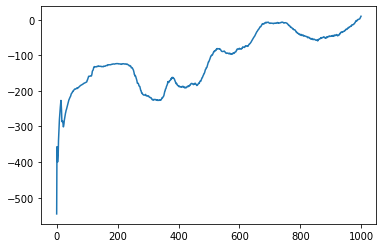

In [27]:
scores = [float(item.split(" ")[-1]) for item in text.split("\n")]

plt.plot(scores)

In [30]:
import pickle

with open("scores.pkl", mode="wb") as f:
    pickle.dump(scores, f)

In [17]:
import torch
torch.save(agent.actor_local.state_dict(), "actor_model.path")
torch.save(agent.critic_local.state_dict(), "critic_model.path")

In [31]:
!ls

actor_model.path   ddpg_agent.py  Lunar-land.ipynb  __pycache__
critic_model.path  ddpg_model.py  main.py	    scores.pkl


###  Seeing the agent in action

In [39]:
state = env.reset()
agent.reset()   
while True:
    action, _ = agent.act(state)
    #action = np.random.randint(4)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break
        
env.close()

/home/randson/workspace/drlnd/lunar_land/ddpg_model.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.fc2(x))
